# Test for mesh

This notebook is just to make sure everything is in line with a short example

In [1]:
import jax.numpy as jnp
import sys
import os
sys.path.append('../..')  
from FVM.src.mesh.mesh import Mesh 

import numpy as np
import matplotlib.pyplot as plt
import meshpy.triangle as triangle
from matplotlib import tri as mtri


size = 4
params = {
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'cm',  # Computer Modern font
	'legend.fontsize':size,
    'axes.labelsize' : size,
	'axes.titlesize' : size +2,
    'xtick.labelsize' : size+1,
    'ytick.labelsize' : size+1
}
plt.rcParams.update(params)


In [2]:
# mesh = Mesh()
# mesh.mesh_generator(maxV=5e-4) # with periodic BC by default


mesh = Mesh()
L = 1
h = 1e-2

N_maille = 4 * int(np.floor(np.sqrt(1/h)))
boundaries = np.array([[x, -L] for x in np.linspace(-L,L,N_maille)][:-1])
markers  = [1] * (N_maille - 1)
boundaries = np.concatenate([boundaries, np.array([[L, y] for y in np.linspace(-L,L,N_maille)][:-1])])
markers.extend([1] * (N_maille - 1))
boundaries = np.concatenate([boundaries, np.array([[x, L] for x in np.linspace(L,-L,N_maille)][:-1])])
markers.extend([1] * (N_maille - 1))
boundaries = np.concatenate([boundaries, np.array([[ -L, y] for y in np.linspace(L,-L,N_maille)][:-1])])
markers.extend([1] * (N_maille-1))

info = triangle.MeshInfo()
info.set_points(boundaries)
info.set_facets(mesh.round_trip_connect(0, len(boundaries)-1), facet_markers=markers)

mesh.mesh_generator(info = info, maxV=h)

In [3]:
list_tris_boundary = jnp.where(jnp.max(mesh.face_markers[mesh.face_connectivity] == 1, axis = -1))[0]
list_tris_boundary

Array([  1,   3,   5,   6,   7,   8,  10,  13,  14,  15,  23,  24,  25,
        30,  32,  34,  35,  36,  39,  40,  49,  51,  54,  58,  65,  69,
        72,  78,  79,  80,  82,  83,  84,  93,  95,  96, 100, 101, 102,
       103, 104, 105, 109, 110, 111, 112, 113, 115, 117, 119, 126, 127,
       128, 129, 130, 131, 132, 133, 135, 136, 142, 145, 147, 152, 154,
       159, 160, 161, 162, 164, 165, 170, 172, 173, 175, 180, 182, 185,
       187, 188, 189, 190, 192, 195, 200, 201, 205, 206, 208, 211, 212,
       213, 214, 217, 218, 223, 226, 231, 232, 233, 236, 239, 240, 243,
       247, 248, 250, 253, 254, 255, 256, 257, 265, 266, 267, 272, 274,
       276, 278, 279, 281, 284, 285, 290, 291, 292, 294, 296, 297, 298,
       301, 304, 306, 318, 321, 323, 324, 325, 334, 344, 352, 354, 355,
       356, 360, 369, 378, 381, 396, 402, 492, 512], dtype=int32)

42
474
381


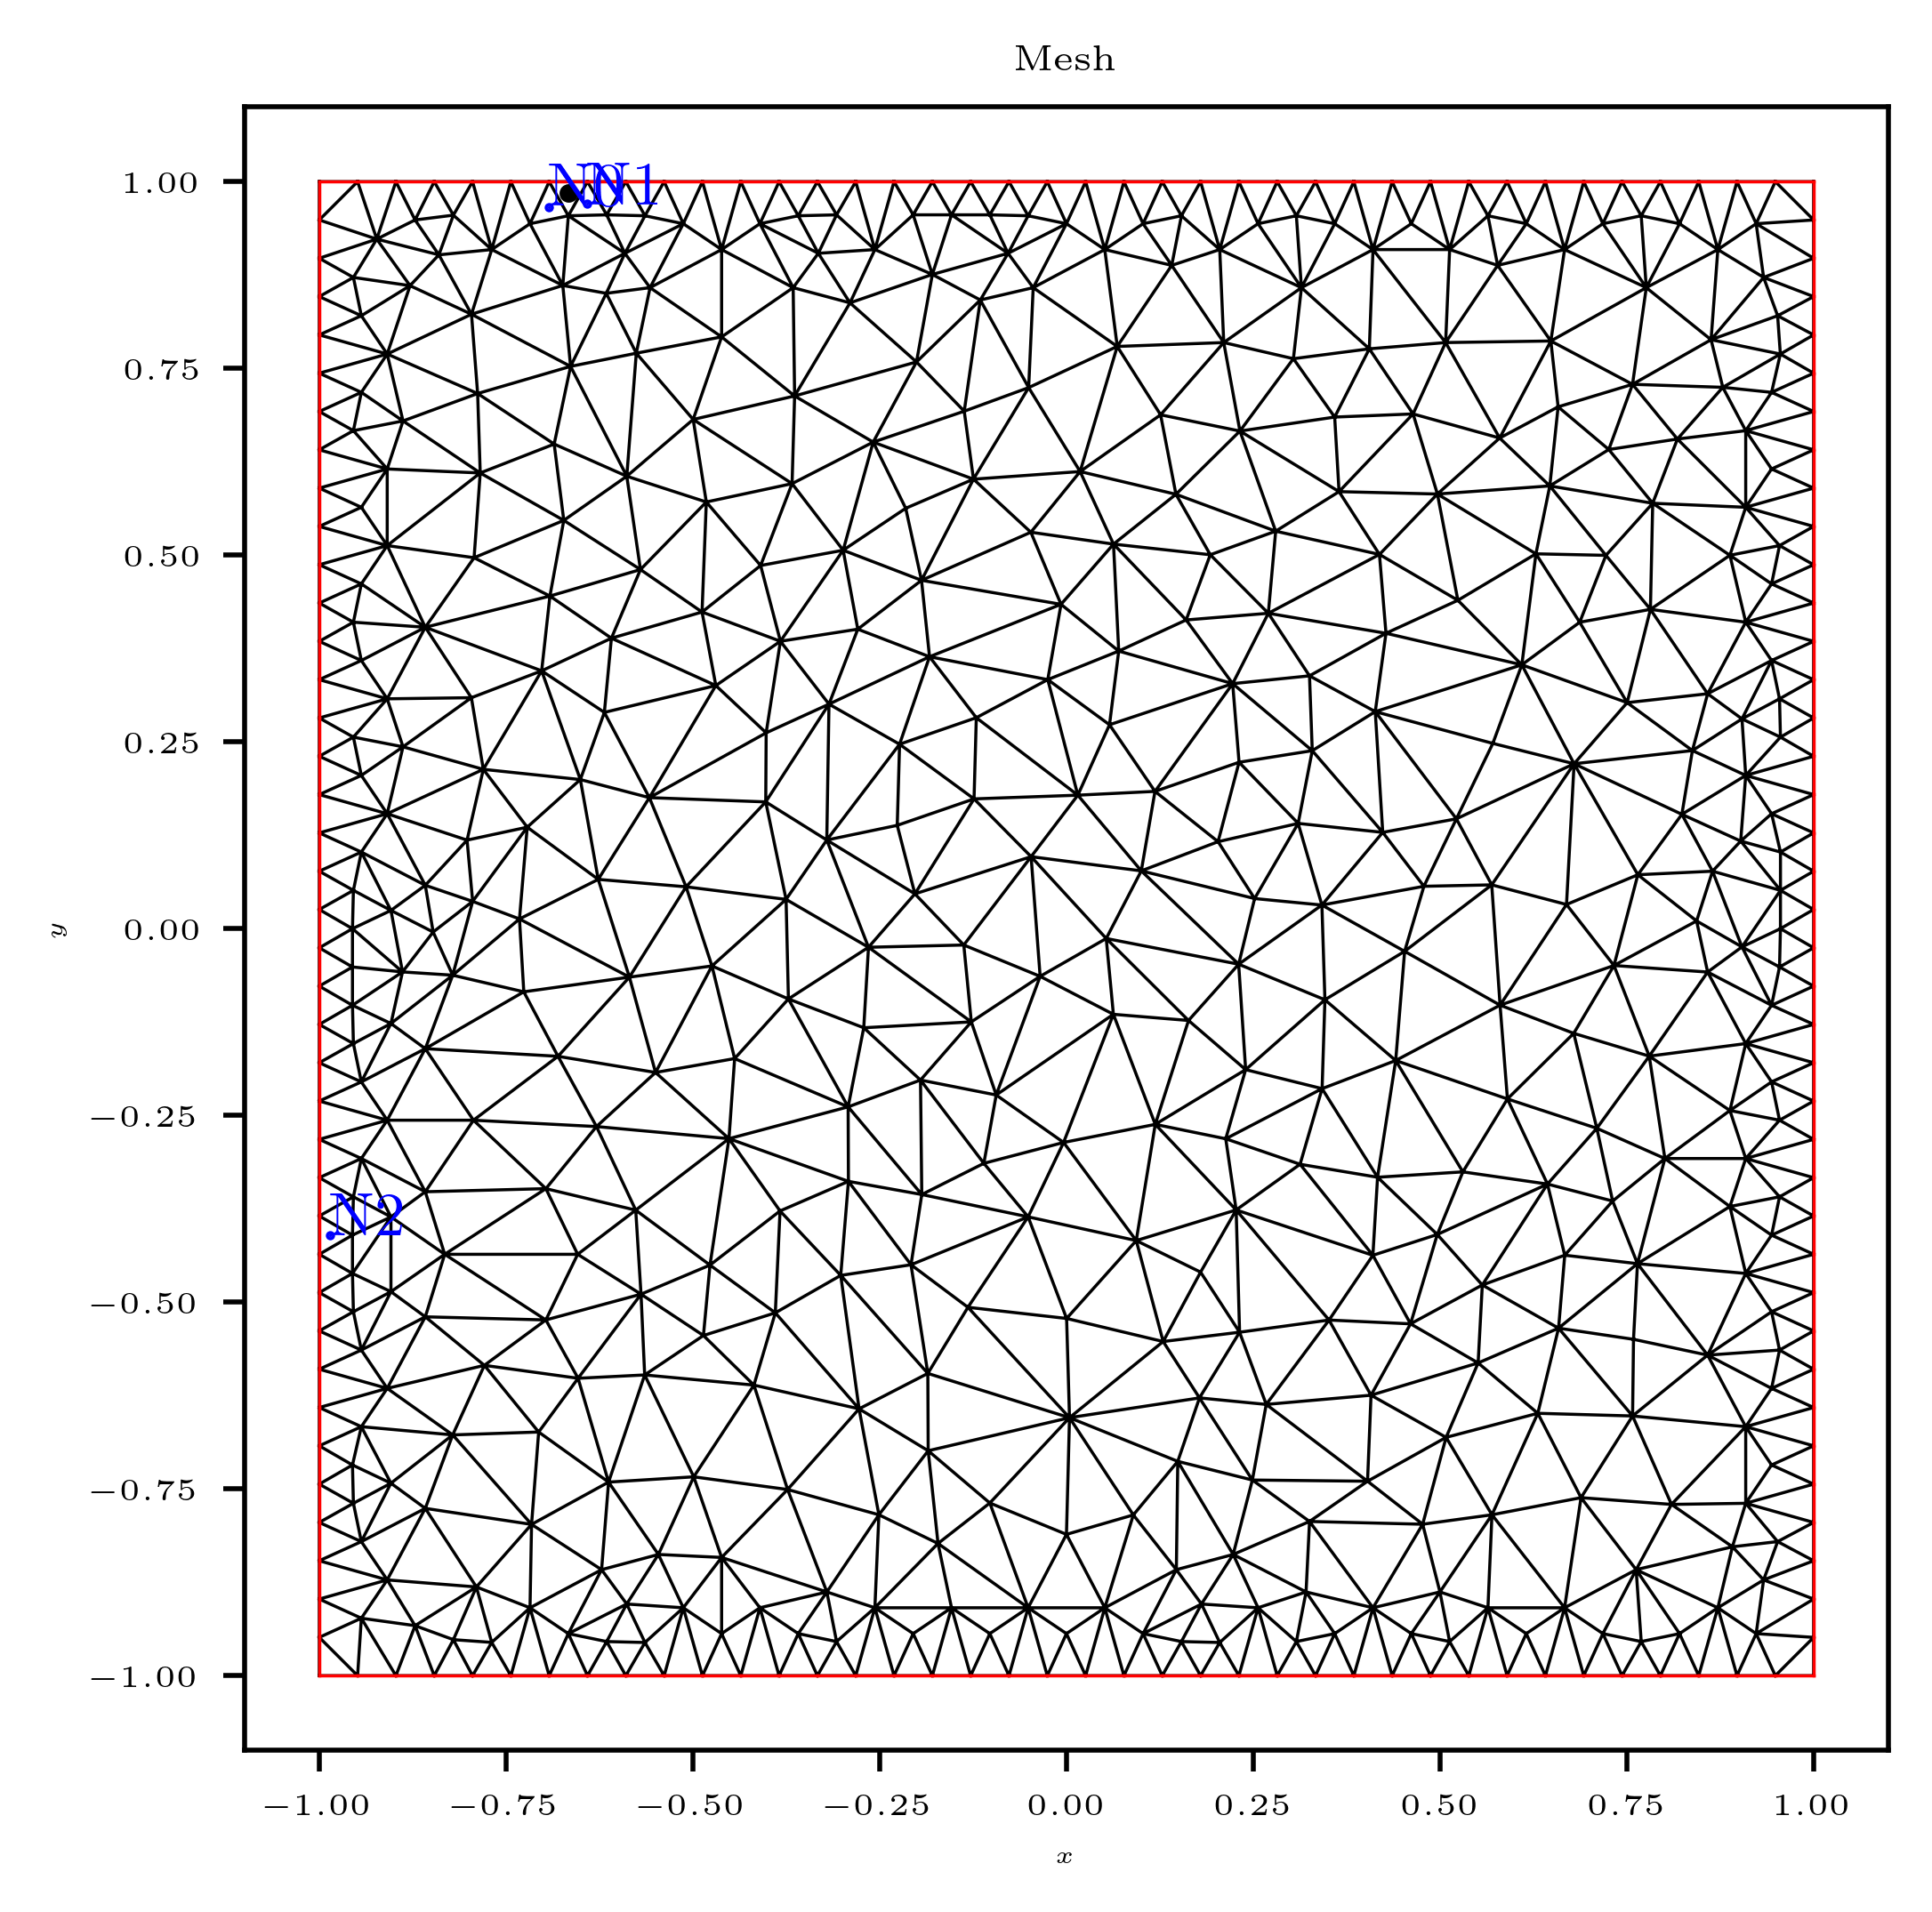

In [8]:
triang = mtri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.tris)

fig, ax = plt.subplots(dpi = 500)
ax.triplot(triang, color='black', lw=0.5)
for bc_marker in jnp.nonzero(jnp.unique(mesh.face_markers))[0]:
    ids = jnp.where(mesh.face_markers == bc_marker)[0]
    for id in ids:
        ax.plot(mesh.points[mesh.faces[id]][...,0], mesh.points[mesh.faces[id]][...,1], 
                color='red', lw=0.5)
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Mesh')

# Get one triangle 
tri = 402

# plot barycenter
ax.plot(mesh.barycenter[tri,0], mesh.barycenter[tri,1], 'o', color='black', markersize=2)

# # plot normals
# for i in range(3):
#     mid  = 0.5 * (mesh.points[mesh.tris[tri,(i)%3]] + mesh.points[mesh.tris[tri,(i+1)%3]])
#     ax.quiver(mid[0], mid[1],
#               mesh.normals[tri,i,0], mesh.normals[tri,i,1],label = str(i),
#             color = 'r',
#             scale=11)
#     ax.text(*mid.T, str(i),
#             ha="right", va="center")
    
# plot neighbors
for i in range(3):
    neighbor = mesh.neighbors[tri,i]
    print(neighbor)
    if neighbor != -1:
        plt.plot(mesh.barycenter[neighbor,0], mesh.barycenter[neighbor,1], 'o', color='blue', markersize=0.5)
        ax.text(mesh.barycenter[neighbor,0], mesh.barycenter[neighbor,1], f'N{i}',
                ha="left", color='blue')
        
# # plot triangle vertices
# for i in range(3):
#     vertex = mesh.tris[tri,i]
#     plt.plot(mesh.points[vertex,0], mesh.points[vertex,1], 'o', color='green', markersize=2)
#     ax.text(mesh.points[vertex,0], mesh.points[vertex,1], f'V{i}',
#             ha="right", color='green')
    
# # plot face adjacency
# for i in range(3):
#     face = mesh.face_connectivity[tri,i]
#     mid  = 0.5 * (mesh.points[mesh.tris[tri,(i)%3]] + mesh.points[mesh.tris[tri,(i+1)%3]])
#     ax.text(mid[0], mid[1], f'F{i}',
#             ha="center", va="bottom", color='purple')
